# Massively Parallel Processing (MPP) Systems for Cloud Based Big Data processing

# Apache Spark, the Industry Standard for MPP Systems

# Machine Learning using Spark

   * ## Lightning-fast unified analytics engine
   * ## Run workloads 100x faster
   * ## Write applications quickly in Java, Scala, Python, R, and SQL
   * ## Combine SQL, streaming, and complex analytics
   * ## Runs everywhere such as 
           * Hadoop, 
           * Apache 
           * Mesos, 
           * Kubernetes, 
           * Standalone, or in the cloud. 
           * It can access diverse data sources
           
 https://www.youtube.com/watch?v=TgiBvKcGL24
 
 https://www.youtube.com/watch?v=qKYpMPPL-fo
 

In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
x = 8
print(x)

8


In [83]:
y = x*5

In [84]:
y
num_samples = 100000000
print(num_samples)

40

100000000


In [85]:
print(num_samples)

100000000


In [86]:
import random

In [87]:
import findspark
findspark.init()
import pyspark
import random
sc = pyspark.SparkContext(appName="Pi")
num_samples = 100000
def inside(p):
    x = random.random()
    y = random.random()
    return x*x + y*y < 1
count = sc.parallelize(range(0, num_samples)).filter(inside).count()
pi = 4 * count / num_samples
print(pi)
sc.stop()

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=wc, master=local[*]) created by __init__ at <ipython-input-8-126406ee9eb2>:1 

In [88]:
sc = pyspark.SparkContext(appName="wc")

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=wc, master=local[*]) created by __init__ at <ipython-input-8-126406ee9eb2>:1 

In [89]:
 contentRDD =sc.textFile('file///C:/users/utpal/desktop/ForMorgan.txt')

In [90]:
contentRDD.first()

'Setting the Context Using the Analogy Framework'

In [91]:
contentRDD.count()

87

In [92]:
nonempty_lines = contentRDD.filter(lambda x: len(x) > 0)
print(nonempty_lines.take(5))
print('-------------------')
index = 0
for line in nonempty_lines.take(5):
    print('Line-', index, line)
    print('-------------------')
    index += 1
words = nonempty_lines.flatMap(lambda x: x.split(' '))
wordcount = words.map(lambda x:(x,1)) .reduceByKey(lambda x,y: x+y) .map(lambda x: (x[1], x[0])).sortByKey(False)
print('====================================')
for word in wordcount.collect():
    print(word)

['Setting the Context Using the Analogy Framework', 'An organization in many ways akin to a human body. Driven by the Leadership (brain) different Stakeholder teams (body parts and mind of a human body perform their tasks, coordinate among each other to act as a highly functional system (body, organization) or stop coordinating among each other and the system (body, organization) becomes increasingly dysfunctional.', 'In the sections that follow, we will use this Organization � Human Body Analogy Framework to explain the concepts, to describe the artifacts delivered by the Leaderscape� platform and how to interpret the results.', 'To set the context, we will make a few observations that hold well in our analogy framework.', 'A cautionary note: the observations listed here are by no means exhaustive. Only the relevant ones to set the context are used in the document.']
-------------------
Line- 0 Setting the Context Using the Analogy Framework
-------------------
Line- 1 An organization

In [93]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [94]:
df = sqlContext.read.load('file:///C:/users/utpal/desktop/regr_data_set/pima-indians-diabetes.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')


In [95]:
df.dtypes

[('Pregnancies', 'int'),
 ('Glucose', 'int'),
 ('BloodP', 'int'),
 ('SkinThick', 'int'),
 ('Insulin', 'int'),
 ('BMI', 'double'),
 ('DiabetesPedigreeFunction', 'double'),
 ('Age', 'int'),
 ('Outcome', 'int')]

In [96]:
df.head(5)

[Row(Pregnancies=6, Glucose=148, BloodP=72, SkinThick=35, Insulin=0, BMI=33.6, DiabetesPedigreeFunction=0.627, Age=50, Outcome=1),
 Row(Pregnancies=1, Glucose=85, BloodP=66, SkinThick=29, Insulin=0, BMI=26.6, DiabetesPedigreeFunction=0.351, Age=31, Outcome=0),
 Row(Pregnancies=8, Glucose=183, BloodP=64, SkinThick=0, Insulin=0, BMI=23.3, DiabetesPedigreeFunction=0.672, Age=32, Outcome=1),
 Row(Pregnancies=1, Glucose=89, BloodP=66, SkinThick=23, Insulin=94, BMI=28.1, DiabetesPedigreeFunction=0.167, Age=21, Outcome=0),
 Row(Pregnancies=0, Glucose=137, BloodP=40, SkinThick=35, Insulin=168, BMI=43.1, DiabetesPedigreeFunction=2.288, Age=33, Outcome=1)]

In [97]:
df.count()

768

In [98]:
from pyspark.sql.functions import *
df.select(max("Pregnancies")).show()

+----------------+
|max(Pregnancies)|
+----------------+
|              17|
+----------------+



In [99]:
df.select("Pregnancies", "Age", "Outcome"). show(10, truncate=False)
df.select("*").show(10, truncate=False)
df.select("*").count()

+-----------+---+-------+
|Pregnancies|Age|Outcome|
+-----------+---+-------+
|6          |50 |1      |
|1          |31 |0      |
|8          |32 |1      |
|1          |21 |0      |
|0          |33 |1      |
|5          |30 |0      |
|3          |26 |1      |
|10         |29 |0      |
|2          |53 |1      |
|8          |54 |1      |
+-----------+---+-------+
only showing top 10 rows

+-----------+-------+------+---------+-------+----+------------------------+---+-------+
|Pregnancies|Glucose|BloodP|SkinThick|Insulin|BMI |DiabetesPedigreeFunction|Age|Outcome|
+-----------+-------+------+---------+-------+----+------------------------+---+-------+
|6          |148    |72    |35       |0      |33.6|0.627                   |50 |1      |
|1          |85     |66    |29       |0      |26.6|0.351                   |31 |0      |
|8          |183    |64    |0        |0      |23.3|0.672                   |32 |1      |
|1          |89     |66    |23       |94     |28.1|0.167                   |

768

In [100]:
df3 = df.select("Insulin").distinct()
df3.show()

+-------+
|Insulin|
+-------+
|    148|
|    540|
|    392|
|     85|
|     65|
|     53|
|    255|
|     78|
|    321|
|    375|
|    155|
|    744|
|    108|
|    193|
|    115|
|    126|
|     81|
|    210|
|    183|
|    300|
+-------+
only showing top 20 rows



In [101]:
pandasdf = df.toPandas()

In [102]:
pandasdf.head(10)

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [103]:
pandasdf.count()
pandasdf.describe()

Pregnancies                 768
Glucose                     768
BloodP                      768
SkinThick                   768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

,Pregnancies,Glucose,BloodP,SkinThick,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [104]:
df.count()

768

In [105]:
df.printSchema()

root
 |-- Pregnancies: integer (nullable = true)
 |-- Glucose: integer (nullable = true)
 |-- BloodP: integer (nullable = true)
 |-- SkinThick: integer (nullable = true)
 |-- Insulin: integer (nullable = true)
 |-- BMI: double (nullable = true)
 |-- DiabetesPedigreeFunction: double (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Outcome: integer (nullable = true)



In [106]:
df.na.drop().count()

768

In [107]:
dfInterest = sqlContext.read.load('file:///C:/users/utpal/desktop/regr_data_set/InterestRate.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [108]:
dfInterest.select("Interest_Rate").distinct().show()
dfInterest.select("Interest_Rate").distinct().count()
dfInterest.select("*").show()

+-------------+
|Interest_Rate|
+-------------+
|          2.5|
|         2.75|
|         2.25|
|          2.0|
|         1.75|
+-------------+



5

+----+-----+-------------+-----------------+-----------------+
|Year|Month|Interest_Rate|Unemployment_Rate|Stock_Index_Price|
+----+-----+-------------+-----------------+-----------------+
|2017|   12|         2.75|              5.3|             1464|
|2017|   11|          2.5|              5.3|             1394|
|2017|   10|          2.5|              5.3|             1357|
|2017|    9|          2.5|              5.3|             1293|
|2017|    8|          2.5|              5.4|             1256|
|2017|    7|          2.5|              5.6|             1254|
|2017|    6|          2.5|              5.5|             1234|
|2017|    5|         2.25|              5.5|             1195|
|2017|    4|         2.25|              5.5|             1159|
|2017|    3|         2.25|              5.6|             1167|
|2017|    2|          2.0|              5.7|             1130|
|2017|    1|          2.0|              5.9|             1075|
|2016|   12|          2.0|              6.0|           

In [109]:
dfInterest = sqlContext.read.load('file:///c:/users/utpal/desktop/otherdata/train_data.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [110]:
dfInterest.head()

Row(Loan_ID='LP001002', Gender='Male', Married='No', Dependents='0', Education='Graduate', Self_Employed='No', ApplicantIncome=5849, CoapplicantIncome=0.0, LoanAmount=None, Loan_Amount_Term=360, Credit_History=1, Property_Area='Urban', Loan_Status='Y')

In [111]:
dfInterest.select("*").show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      null|             360|             1|        Urban|          Y|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|             360|             1|        Urban|          Y

In [112]:
from pyspark.ml.feature import StringIndexer
plan_indexer = StringIndexer(inputCol = 'Property_Area', outputCol = 'Prop_Area')
labeller = plan_indexer.fit(dfInterest)

dfI = labeller.transform(dfInterest)

In [113]:
dfI.select("Property_Area", "Prop_Area").show()

+-------------+---------+
|Property_Area|Prop_Area|
+-------------+---------+
|        Urban|      1.0|
|        Rural|      2.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|    Semiurban|      0.0|
|        Urban|      1.0|
|    Semiurban|      0.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Rural|      2.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Urban|      1.0|
|        Rural|      2.0|
|        Urban|      1.0|
+-------------+---------+
only showing top 20 rows



In [114]:
dfI.select("*").show()

+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+---------+
| Loan_ID|Gender|Married|Dependents|   Education|Self_Employed|ApplicantIncome|CoapplicantIncome|LoanAmount|Loan_Amount_Term|Credit_History|Property_Area|Loan_Status|Prop_Area|
+--------+------+-------+----------+------------+-------------+---------------+-----------------+----------+----------------+--------------+-------------+-----------+---------+
|LP001002|  Male|     No|         0|    Graduate|           No|           5849|              0.0|      null|             360|             1|        Urban|          Y|      1.0|
|LP001003|  Male|    Yes|         1|    Graduate|           No|           4583|           1508.0|       128|             360|             1|        Rural|          N|      2.0|
|LP001005|  Male|    Yes|         0|    Graduate|          Yes|           3000|              0.0|        66|       

In [115]:
newdf = sqlContext.read.load('file:///C:/users/utpal/desktop/pyspark/pa_reimb_county_2014.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')

In [116]:
newdf.head(20)

newdf_pandas = newdf.toPandas()
newdf_pandas.head(20)

[Row(County ID=None, County name=None, Medicare enrollees (2014)=None, Total Medicare reimbursements per enrollee (Parts A and B) (2014)='Age, sex & race-adjusted', _c4='Price, age, sex & race-adjusted', Hospital & skilled nursing facility reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c6='Price, age, sex & race-adjusted', Physician reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c8='Price, age, sex & race-adjusted', Outpatient facility reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c10='Price, age, sex & race-adjusted', Home health agency reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c12='Price, age, sex & race-adjusted', Hospice reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c14='Price, age, sex & race-adjusted', Durable medical equipment reimbursements per enrollee (2014)='Age, sex & race-adjusted', _c16='Price, age, sex & race-adjusted'),
 Row(County ID=1001, County name='AL-Autauga County', Medica

,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (Parts A and B) (2014),_c4,Hospital & skilled nursing facility reimbursements per enrollee (2014),_c6,Physician reimbursements per enrollee (2014),_c8,Outpatient facility reimbursements per enrollee (2014),_c10,Home health agency reimbursements per enrollee (2014),_c12,Hospice reimbursements per enrollee (2014),_c14,Durable medical equipment reimbursements per enrollee (2014),_c16
0,NaN,None,None,"Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted","Age, sex & race-adjusted","Price, age, sex & race-adjusted"
1,1001.0,AL-Autauga County,"4,649","8,499","9,859","3,224","4,053","2,371","2,539","1,712","1,949",420,477,521,628,252,233
2,1003.0,AL-Baldwin County,"22,607","8,029","9,413","2,809","3,696","2,690","2,847","1,310","1,519",576,682,385,451,248,227
3,1005.0,AL-Barbour County,"3,037","8,708","10,117","3,368","4,168","2,442","2,610","1,523","1,770",539,628,613,731,256,235
4,1007.0,AL-Bibb County,"1,839","9,809","10,817","4,100","4,740","2,559","2,669","1,672","1,809",901,968,426,483,182,193
5,1009.0,AL-Blount County,"4,408","8,922","10,036","3,534","4,230","2,644","2,764","1,412","1,564",555,611,588,682,210,229
6,1011.0,AL-Bullock County,"1,054","8,001","9,276","3,296","4,053","2,000","2,129","1,662","1,901",347,401,501,589,219,193
7,1013.0,AL-Butler County,"2,932","8,909","10,408","3,501","4,352","1,989","2,097","1,726","1,994",699,832,699,844,298,276
8,1015.0,AL-Calhoun County,"15,503","9,053","10,673","3,703","4,796","2,662","2,843","1,308","1,495",626,704,560,676,221,203
9,1017.0,AL-Chambers County,"4,806","7,430","8,623","2,944","3,698","1,986","2,154","1,534","1,692",339,389,442,521,195,177


In [117]:
newdf.select("*").show(10, truncate=False)
newdf.select("*").count()

+---------+------------------+-------------------------+-----------------------------------------------------------------+-------------------------------+----------------------------------------------------------------------+-------------------------------+--------------------------------------------+-------------------------------+------------------------------------------------------+-------------------------------+-----------------------------------------------------+-------------------------------+------------------------------------------+-------------------------------+------------------------------------------------------------+-------------------------------+
|County ID|County name       |Medicare enrollees (2014)|Total Medicare reimbursements per enrollee (Parts A and B) (2014)|_c4                            |Hospital & skilled nursing facility reimbursements per enrollee (2014)|_c6                            |Physician reimbursements per enrollee (2014)|_c8                   

3145

In [118]:
newdf.printSchema()

root
 |-- County ID: integer (nullable = true)
 |-- County name: string (nullable = true)
 |-- Medicare enrollees (2014): string (nullable = true)
 |-- Total Medicare reimbursements per enrollee (Parts A and B) (2014): string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- Hospital & skilled nursing facility reimbursements per enrollee (2014): string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- Physician reimbursements per enrollee (2014): string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- Outpatient facility reimbursements per enrollee (2014): string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- Home health agency reimbursements per enrollee (2014): string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- Hospice reimbursements per enrollee (2014): string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- Durable medical equipment reimbursements per enrollee (2014): string (nullable = true)
 |-- _c16: string (nullable 

In [79]:
# sc = pyspark.SparkContext(appName="wc")
# contentRDD =sc.textFile('file///C:/users/utpal/desktop/ForMorgan.txt')

import numpy as np
import math
import MyStatsProblib as mystats

INPUT = "file///C:/Users/utpal/desktop/pyspark/pa_reimb_county_2014.csv"

df_sql = sqlContext.read.load('file:///C:/users/utpal/desktop/pyspark/pa_reimb_county_2014-1.csv', 
                          format='com.databricks.spark.csv', 
                          header='true', 
                          inferSchema='true')
# df_sql.count()
df_pandas = df_sql.toPandas()

#df_pandas.isnull().sum()
df_pandas["Total Medicare reimbursements per enrollee (Parts A and B) (2014)"].fillna(0,inplace=True)

col_4 = df_pandas["Total Medicare reimbursements per enrollee (Parts A and B) (2014)"]

mean = mystats.mean(col_4)
stddev = mystats.standard_deviation(col_4)

print('Mean =', mean)
print('Stddev = ', stddev)
lower_limit = (mean - 3 * stddev)
upper_limit = (mean + 4 * stddev)
upper_limit1 = (mean + 3 * stddev)
print('Lower Limit = ', lower_limit, 'Upper Limit = ', upper_limit)

#outliers = df_pandas.loc[(col_4 < lower_limit) | (col_4 > upper_limit)]
outliers = df_pandas.loc[(col_4 > upper_limit)]
outliers1 = df_pandas.loc[(col_4 > upper_limit1)]
outliers.head(10)
outliers.count()
# print(outliers)



Mean = 8949.46
Stddev =  1302.23
Lower Limit =  5042.769999999999 Upper Limit =  14158.38


,County ID,County name,Medicare enrollees (2014),Total Medicare reimbursements per enrollee (Parts A and B) (2014),"Price, age, sex & race-adjusted4",Hospital & skilled nursing facility reimbursements per enrollee (2014),"Price, age, sex & race-adjusted6",Physician reimbursements per enrollee (2014),"Price, age, sex & race-adjusted8",Outpatient facility reimbursements per enrollee (2014),"Price, age, sex & race-adjusted10",Home health agency reimbursements per enrollee (2014),"Price, age, sex & race-adjusted12",Hospice reimbursements per enrollee (2014),"Price, age, sex & race-adjusted14",Durable medical equipment reimbursements per enrollee (2014),"Price, age, sex & race-adjusted16"
362,12086.0,FL-Miami-Dade County,110028.0,14672.0,14097.0,5697.0,5396.0,3947.0,3754.0,1442.0,1447.0,2101.0,2094.0,655.0,548.0,210.0,217.0
1156,22087.0,LA-St. Bernard Parish,1416.0,14171.0,14787.0,7584.0,7862.0,2763.0,2831.0,2056.0,2183.0,1035.0,1129.0,497.0,532.0,259.0,276.0
1851,36047.0,NY-Kings County,133983.0,14217.0,11980.0,7399.0,5507.0,4596.0,4171.0,1362.0,1482.0,519.0,564.0,170.0,127.0,186.0,192.0
2588,48131.0,TX-Duval County,1135.0,14884.0,15987.0,5715.0,6340.0,3400.0,3518.0,1716.0,1830.0,2889.0,3023.0,596.0,718.0,239.0,206.0
2646,48247.0,TX-Jim Hogg County,533.0,15034.0,15948.0,5803.0,6382.0,3989.0,4022.0,1981.0,2082.0,2367.0,2500.0,436.0,520.0,211.0,168.0


County ID                                                                 5
County name                                                               5
Medicare enrollees (2014)                                                 5
Total Medicare reimbursements per enrollee (Parts A and B) (2014)         5
Price, age, sex & race-adjusted4                                          5
Hospital & skilled nursing facility reimbursements per enrollee (2014)    5
Price, age, sex & race-adjusted6                                          5
Physician reimbursements per enrollee (2014)                              5
Price, age, sex & race-adjusted8                                          5
Outpatient facility reimbursements per enrollee (2014)                    5
Price, age, sex & race-adjusted10                                         5
Home health agency reimbursements per enrollee (2014)                     5
Price, age, sex & race-adjusted12                                         5
Hospice reim

0       8
1       2
2       8
3       6
4       1
       ..
2853    9
2854    8
2855    3
2856    2
2857    4
Name: prediction, Length: 2858, dtype: int32

,County ID,County name,Total Medicare reimbursements per enrollee (Parts A and B) (2014),prediction
0,1001.0,AL-Autauga County,8499.0,8
1,1003.0,AL-Baldwin County,8029.0,2
2,1005.0,AL-Barbour County,8708.0,8
3,1007.0,AL-Bibb County,9809.0,6
4,1009.0,AL-Blount County,8922.0,1
5,1011.0,AL-Bullock County,8001.0,2
6,1013.0,AL-Butler County,8909.0,1
7,1015.0,AL-Calhoun County,9053.0,1
8,1017.0,AL-Chambers County,7430.0,3
9,1019.0,AL-Cherokee County,9706.0,6


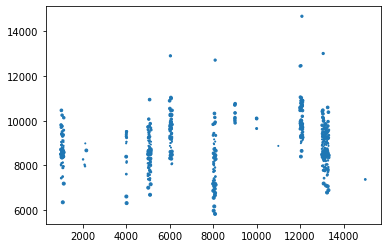

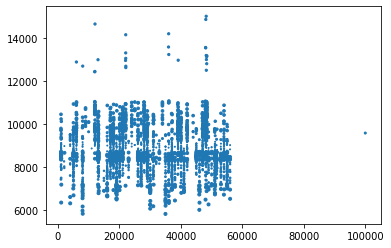

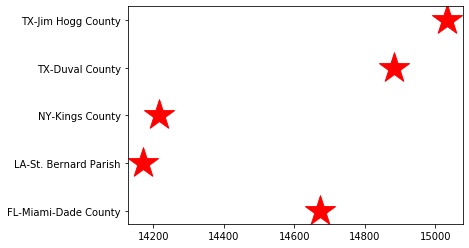

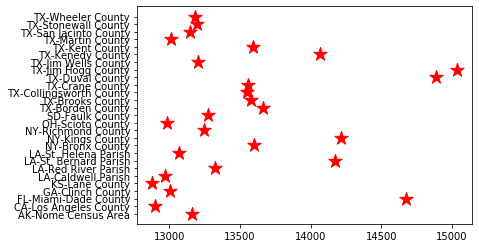

In [119]:

from __future__ import print_function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt1
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_blobs
from pyspark import SparkContext
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SQLContext

%matplotlib inline

df_sql = df_sql.na.drop()

vecAssembler = VectorAssembler(inputCols=["Total Medicare reimbursements per enrollee (Parts A and B) (2014)"], outputCol="features")
new_df = vecAssembler.transform(df_sql)

kmeans = KMeans(k=10, seed=1)  # 5 clusters here
model = kmeans.fit(new_df.select('features'))

transformed = model.transform(new_df)

df_pandas1 = transformed.toPandas()

df_pandas1['prediction']

df_selected = df_pandas1[['County ID', 'County name', 'Total Medicare reimbursements per enrollee (Parts A and B) (2014)','prediction']]
df_selected
df_head = df_selected.head(500)

plt1.scatter(df_head['County ID'],  df_head['Total Medicare reimbursements per enrollee (Parts A and B) (2014)'], df_head['prediction'], label='True Position', cmap='rainbow')
plt1.show()

plt1.scatter(df_pandas1['County ID'],  df_pandas1['Total Medicare reimbursements per enrollee (Parts A and B) (2014)'], df_pandas1['prediction'], label='True Position', cmap='rainbow')
plt1.show()

plt1.scatter(outliers['Total Medicare reimbursements per enrollee (Parts A and B) (2014)'], outliers['County name'], marker='*', color='red', s=1000, label='True Position', cmap='rainbow')
plt1.show()

plt1.scatter(outliers1['Total Medicare reimbursements per enrollee (Parts A and B) (2014)'], outliers1['County name'], marker='*', color='red', s=200, label='True Position', cmap='rainbow')
plt1.show()